In [1]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import shutil
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf


Using TensorFlow backend.


In [2]:
import os 
import pandas as pd

data_dir = "desktop/nfdl/train/"
classes = os.listdir(data_dir)

image_counts={}
for c in classes:
    try: 
        path = data_dir + c
        count = len(os.listdir(path))
        image_counts[c]= count
    except:
        pass

data = pd.DataFrame.from_dict(image_counts, orient='index')
data

,0
plexiform_nf,21
schwan_nf,12


In [3]:
import os 
import pandas as pd

data_dir = "desktop/nfdl/validate/"
classes = os.listdir(data_dir)

image_counts={}
for c in classes:
    try: 
        path = data_dir + c
        count = len(os.listdir(path))
        image_counts[c]= count
    except:
        pass

df = pd.DataFrame.from_dict(image_counts, orient='index')
df

,0
plexiform_nf,6
schwan_nf,6


In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory('desktop/nfdl/train/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

train_generator.class_indices


Found 31 images belonging to 2 classes.


{'plexiform_nf': 0, 'schwan_nf': 1}

In [6]:
validation_generator = test_dataset.flow_from_directory('desktop/nfdl/validate/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator.class_indices


Found 10 images belonging to 2 classes.


{'plexiform_nf': 0, 'schwan_nf': 1}

In [7]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 15
)

Epoch 1/10
50/50 [==============================] - 193s 4s/step - loss: 0.4737 - accuracy: 0.7619 - val_loss: 0.2367 - val_accuracy: 1.0000
Epoch 2/10
50/50 [==============================] - 204s 4s/step - loss: 0.1688 - accuracy: 0.9316 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 216s 4s/step - loss: 0.0407 - accuracy: 0.9839 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 4/10
50/50 [==============================] - 212s 4s/step - loss: 0.0271 - accuracy: 0.9929 - val_loss: 1.2543e-04 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 201s 4s/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 6.2986e-05 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 201s 4s/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 201s 4s/step - loss: 0.0096 - accuracy: 0.9961 - val_loss: 4.9912e-04 - val_accuracy: 1.0000
E

In [8]:
model.save("nfdl.h5")

In [9]:
history = history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


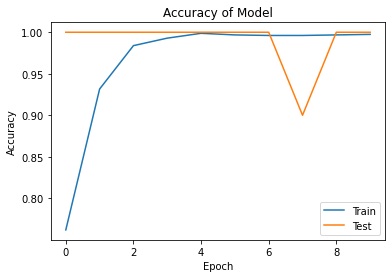

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

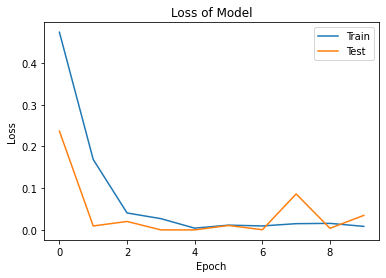

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()